In [1]:
#!pip install ewl

In [2]:
%matplotlib inline

In [3]:
from ewl import EWL
from ewl.ibmq import EWL_IBMQ
from ewl.parametrizations import U_theta_alpha_beta

import sympy as sp
from sympy import Matrix
from sympy.physics.quantum.qubit import Qubit

from qiskit import IBMQ
from qiskit.visualization import plot_histogram

sp.init_printing()
IBMQ.load_account()

i = sp.I
pi = sp.pi
sqrt2 = sp.sqrt(2)

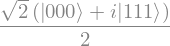

In [4]:
psi = (Qubit('000') + i * Qubit('111')) / sqrt2
psi

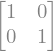

In [5]:
C = Matrix([
    [1, 0],
    [0, 1],
])
C

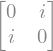

In [6]:
D = Matrix([
    [0, i],
    [i, 0],
])
D

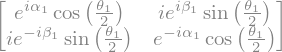

In [7]:
theta1, alpha1, beta1 = sp.symbols('theta1 alpha1 beta1', real=True)
alice = U_theta_alpha_beta(theta=theta1, alpha=alpha1, beta=beta1)
alice

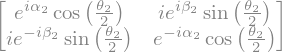

In [8]:
theta2, alpha2, beta2 = sp.symbols('theta2 alpha2 beta2', real=True)
bob = U_theta_alpha_beta(theta=theta2, alpha=alpha2, beta=beta2)
bob

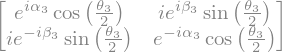

In [9]:
theta3, alpha3, beta3 = sp.symbols('theta3 alpha3 beta3', real=True)
charlie = U_theta_alpha_beta(theta=theta3, alpha=alpha3, beta=beta3)
charlie

In [10]:
ewl = EWL(psi=psi, C=C, D=D, players=[alice, bob, charlie])
ewl

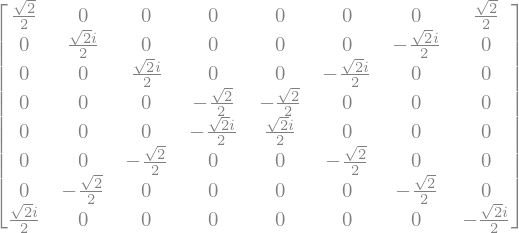

In [11]:
ewl.J

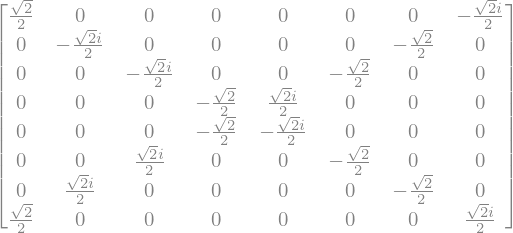

In [12]:
ewl.J_H

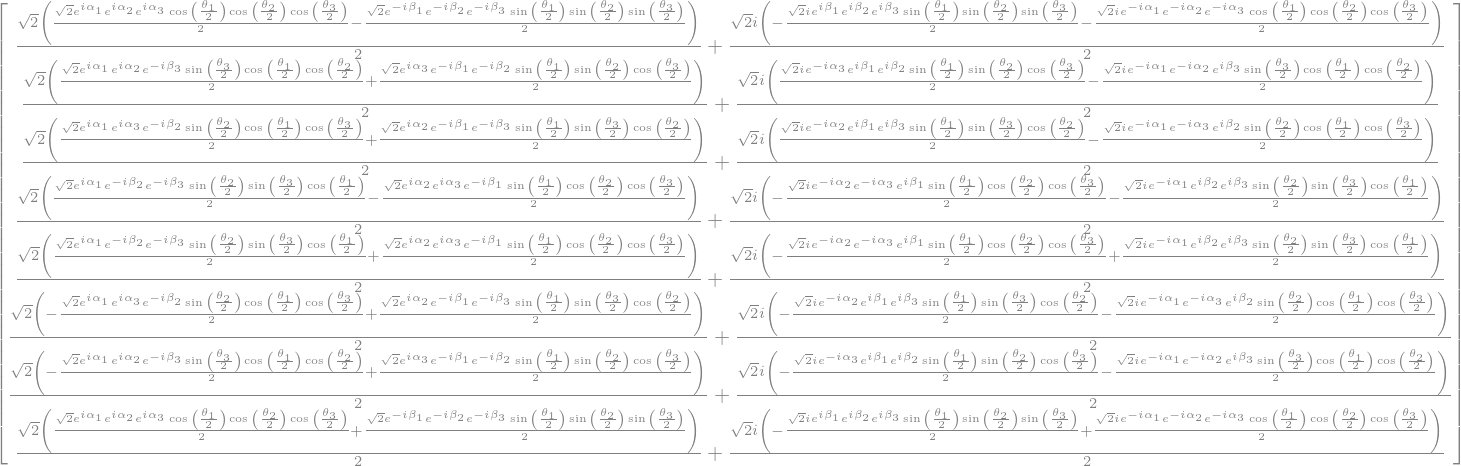

In [13]:
ewl.amplitudes(simplify=False)

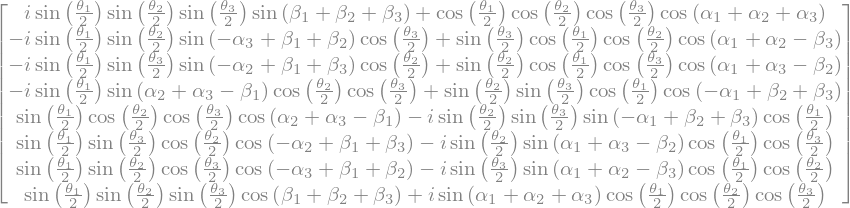

In [14]:
ewl.amplitudes()

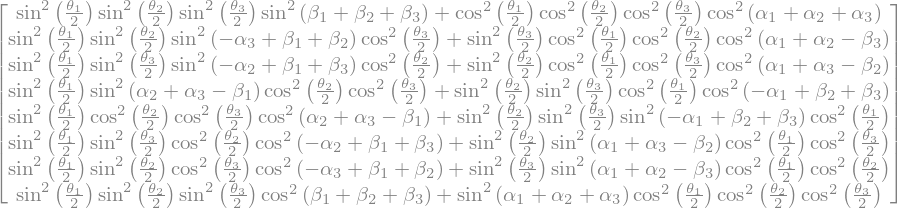

In [15]:
ewl.probs()

In [16]:
ewl.params

In [17]:
ewl_fixed = ewl.fix(theta1=pi / 2, alpha1=pi / 2, beta1=0,
                    theta2=pi / 2, alpha2=pi / 2, beta2=pi / 4,
                    theta3=0, alpha3=0, beta3=0)

In [18]:
ewl_fixed.params

In [19]:
ewl_ibmq = EWL_IBMQ(ewl_fixed)
ewl_ibmq

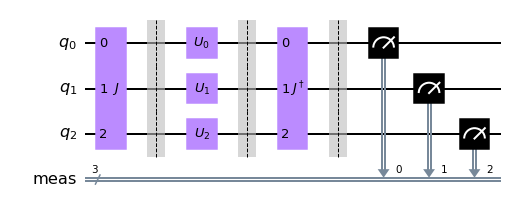

In [20]:
ewl_ibmq.draw()

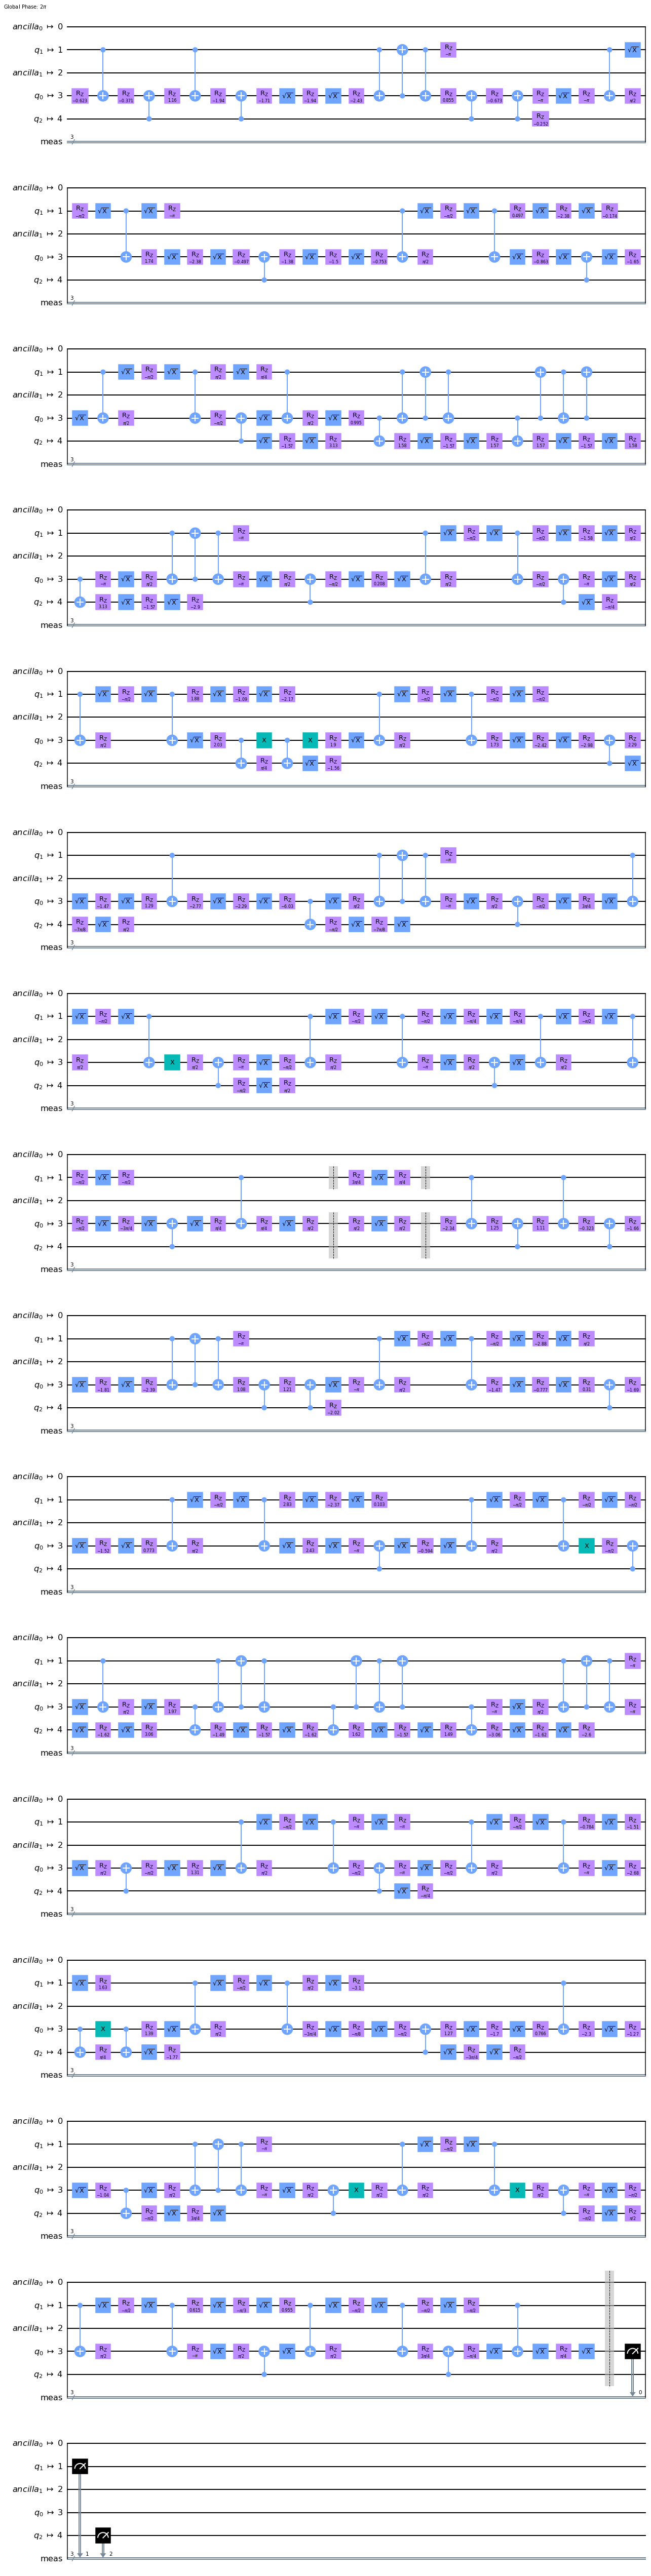

In [21]:
ewl_ibmq.draw_transpiled(backend_name='ibmq_quito', optimization_level=3)

{'000': 0.25, '010': 0.125, '011': 0.125, '100': 0.125, '101': 0.125, '110': 0.25}


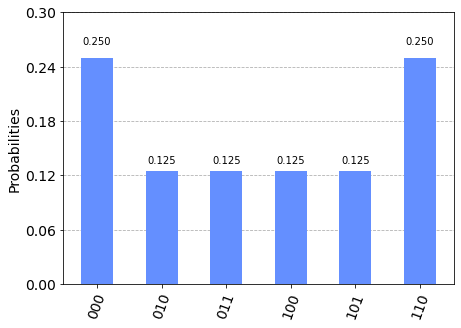

In [22]:
probs = ewl_ibmq.simulate_probs()
print(probs)
plot_histogram(probs)

{'101': 133, '110': 289, '100': 114, '000': 240, '010': 138, '011': 110}


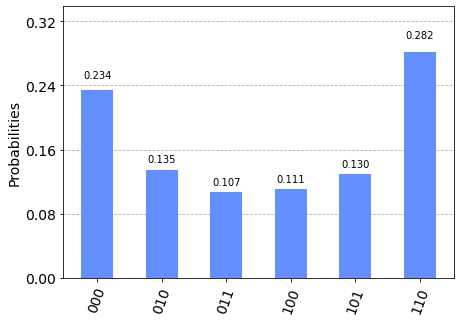

In [23]:
counts_qasm_simulator = ewl_ibmq.simulate_counts()
print(counts_qasm_simulator)
plot_histogram(counts_qasm_simulator)

Job Status: job has successfully run
{'000': 533, '001': 455, '010': 403, '011': 470, '100': 520, '101': 470, '110': 617, '111': 532}


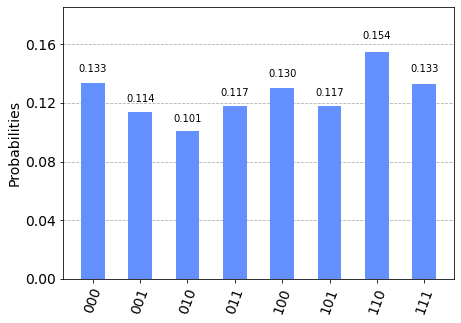

In [24]:
counts_quantum_device = ewl_ibmq.run()
print(counts_quantum_device)
plot_histogram(counts_quantum_device)

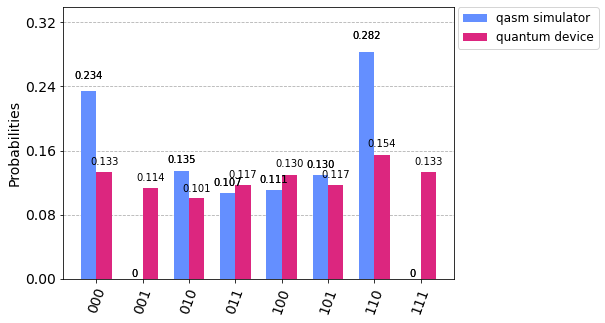

In [25]:
plot_histogram(data=[counts_qasm_simulator, counts_quantum_device],
               legend=['qasm simulator', 'quantum device'])